In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob
from collections import Counter

In [5]:
ls

README.md  figs/      library/   notebooks/


cd ..

### COMBINE GAMExGAME POSSESSION DATA INTO ONE POSS_DF

In [6]:
#give file path abbreviation
poss_path_abbr = 'library/possessions/Possessions vs.*.csv'
#create list of files that match the possession convention
file_list = glob.glob(poss_path_abbr)
#create an empty df
poss_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall poss_df
    poss_df = poss_df.append(df_)

In [7]:
poss_df.head()

,Created,Point,Possession,Started point on offense?,Scored?,Start X (0 -> 1 = left sideline -> right sideline),Start Y (0 -> 1 = back of opponent endzone -> back of own endzone),Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,opponent
0,2020-02-26 20:24:33,1,1,0,0,0.187023,0.822740,Andrew Edelman,4,NaN,NaN,NaN,Andrew Edelman,NaN,NaN,HIP
1,2020-02-26 20:26:03,2,1,1,1,0.704198,0.802260,Victor Kao,5,Ian McInerney,Jeff Voss,Gabe Stump,NaN,NaN,NaN,HIP
2,2020-02-26 20:27:57,4,1,1,1,0.498092,0.786017,Owen Marschall,7,Sam Pollack,Odie,Jeff Voss,NaN,NaN,NaN,HIP
3,2020-02-26 20:30:04,6,1,1,0,0.492366,0.822740,Owen Marschall,3,NaN,NaN,NaN,Gabe Stump,NaN,NaN,HIP
4,2020-02-26 20:32:02,7,1,0,1,0.251908,0.807203,Zero,2,Zero,Odie,Sam Alston,NaN,NaN,NaN,HIP


### COMBINE GAMExGAME PASSES DATA INTO ONE PASSES_DF

In [8]:
#give file path abbreviation
passes_path_abbr = 'library/passes/Passes vs.*.csv'
#create list of files that match the passes convention
file_list = glob.glob(passes_path_abbr)
#create an empty df
passes_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall passes_df
    passes_df = passes_df.append(df_)

#remove all of the empty data with no thrower nor reciever
passes_df = passes_df.dropna(subset=['Thrower', 'Receiver'])

In [9]:
passes_df.head()

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,From sideline?,To sideline?,Distance (m),Forward distance (m),Left-to-right distance (m),Start X (0 -> 1 = left sideline -> right sideline),Start Y (0 -> 1 = back of opponent endzone -> back of own endzone),End X (0 -> 1 = left sideline -> right sideline),End Y (0 -> 1 = back of opponent endzone -> back of own endzone),opponent
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,0,11.115858,4.943502,-9.956108,0.265267,0.816384,0.534351,0.766949,Lost Boys
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,0,0,5.945641,1.624298,5.719467,0.534351,0.766949,0.379771,0.750706,Lost Boys
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,0,0,14.086006,6.497174,-12.498092,0.379771,0.750706,0.717557,0.685734,Lost Boys
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,0,0,8.952368,4.802257,7.555344,0.717557,0.685734,0.513359,0.637712,Lost Boys
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,0,0,7.909012,-3.954798,6.849237,0.513359,0.637712,0.328244,0.677260,Lost Boys


### MERGE THE PASSES_DF WITH THE POSS_DF

In [10]:
full_poss_df = pd.merge(passes_df,poss_df,how='left',on=['Point','Possession','opponent'],copy=False)
full_poss_df = full_poss_df.reset_index(drop=True)
full_poss_df = full_poss_df.drop(columns=['Created_y','Start X (0 -> 1 = left sideline -> right sideline)_y',
                  'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_y'])

In [11]:
full_poss_df.columns = [x.replace('_x','') for x in full_poss_df.columns]

In [12]:
full_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [13]:
#create a unique posession index based on opponent, point#, possession#
for x in full_poss_df.index:
    full_poss_df.loc[x,'possession_index'] = full_poss_df.loc[x,'opponent'] + ' | ' + \
    str(full_poss_df.loc[x,'Point']) + '.' + \
    str(full_poss_df.loc[x,'Possession'])

In [14]:
#write to CSV
full_poss_df.to_csv('library/possessions/BP_2019_Full_Possession_Data.csv')

In [15]:
full_poss_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2020-02-18 19:01:10,14,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1
1159,2020-02-18 19:01:19,14,1,Max Cohen,Sam Pollack,0,0,0,0,0,...,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1
1160,2020-02-18 19:01:25,14,1,Sam Pollack,Jeff Voss,0,0,0,0,0,...,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1
1161,2020-02-18 19:01:29,14,1,Jeff Voss,Carter Thallon,0,0,0,0,0,...,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1


In [16]:
#create a dataframe with only unique possession indices
#this is the same thing as creating a dataframe with only the first throw of each possession
unique_poss_df = full_poss_df.drop_duplicates(['possession_index','Passes'])

### What is a centering pass?

In [17]:
#first pass
#first possession of a point
#offensive point
#NOT a brick
# - First Start X and Start Y cannot be near the brick (2x2m box)
# ---- (.55 >= Start X >= .45)
# ---- ((1-.381818) >= Start Y >= (1-.345454))
#End X and End Y are in some sort of pre-designated box
# - What is the box? (Goal line to 25 yds, middle ten yards)
# --- (.625 >= Start X >= .375)
# --- ((1-.409090) >= Start Y >= (1-.163636))

In [18]:
(1-.381818)

0.618182

In [19]:
(1-.345454)

0.6545460000000001

In [20]:
unique_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out', 'possession_index'],
      dtype='object')

#### FILTER 1

In [21]:
#filter so that it's all 1st possessions and started point on offense
filt1 = (unique_poss_df['Possession'] == 1) & (unique_poss_df['Started point on offense?'] == 1)

In [22]:
#find box values for brick mark
print(43/110) #upper y
print(37/110) #lower y
print(23/40) #right x
print(17/40) #left x

0.39090909090909093
0.33636363636363636
0.575
0.425


#### FILTER 2

In [23]:
#filter out starting at the brick
#3x3 box around the brick mark
filt2 = ~((unique_poss_df['Start X (0 -> 1 = left sideline -> right sideline)'] 
               <= .575) & 
              (unique_poss_df['Start X (0 -> 1 = left sideline -> right sideline)'] 
               >= .425) & 
              (unique_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
               >= (1-.390909)) &
              (unique_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
               <= (1-.336363)))

#### FILTER 3

In [24]:
#filter out to receivers are only handlers
list(full_poss_df['Thrower'].unique())
handlers = ['Evan Ma','Max Cohen','Victor Kao','Andrew Edelman','Geo Zheng','Owen Marschall',
           'Ruozhou Ye','Nadav Pearl','Juleon Robinson','Alon Brown']
filt3 = unique_poss_df['Receiver'].isin(handlers)

#### FILTER 4

In [25]:
#End X and End Y are in some sort of pre-designated box
# - What is the box? (Goal line to 25 yds, middle ten yards)
# --- (.625 >= Start X >= .375)
# --- ((1-.409090) >= Start Y >= (1-.163636))

In [26]:
#find box values for box that makes up a (centering pass)
print(50/110) #upper y
print(15/110) #lower y
print(30/40) #right x
print(10/40) #left x

0.45454545454545453
0.13636363636363635
0.75
0.25


In [27]:
#filter to only include first passes that ended up in a select box
filt4 = ((unique_poss_df['End X (0 -> 1 = left sideline -> right sideline)'] 
               <= .75) & 
              (unique_poss_df['End X (0 -> 1 = left sideline -> right sideline)'] 
               >= .25) & 
              (unique_poss_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
               >= (1-.454545)) &
              (unique_poss_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
               <= (1-.136363)))

#### FILTER 5

In [28]:
#only forward passes
filt5 = (unique_poss_df['Forward distance (m)'] > 0)

#### APPLY FILTERS

In [29]:
#apply all filters
first_pass_df = unique_poss_df[filt1 & filt2 & filt3 & filt4 & filt5]
first_pass_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
17,2020-02-26 23:08:14,4,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,Evan Ma,6,NaN,NaN,NaN,Evan Ma,NaN,NaN,Lost Boys | 4.1
50,2020-02-26 23:18:03,9,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,Owen Marschall,3,Max Cohen,Eliot Bemis,Carter Thallon,NaN,NaN,NaN,Lost Boys | 9.1
86,2020-02-26 23:24:24,12,1,Ruozhou Ye,Andrew Edelman,0,0,0,0,0,...,0,Ruozhou Ye,4,NaN,NaN,NaN,Ruozhou Ye,NaN,NaN,Lost Boys | 12.1
90,2020-02-26 23:25:20,13,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,13,Max Cohen,Carter Thallon,Victor Kao,NaN,NaN,NaN,Lost Boys | 13.1
120,2020-02-26 20:26:06,2,1,Victor Kao,Max Cohen,0,0,0,0,0,...,1,Victor Kao,5,Ian McInerney,Jeff Voss,Gabe Stump,NaN,NaN,NaN,HIP | 2.1
125,2020-02-26 20:28:00,4,1,Owen Marschall,Victor Kao,0,0,0,0,0,...,1,Owen Marschall,7,Sam Pollack,Odie,Jeff Voss,NaN,NaN,NaN,HIP | 4.1
132,2020-02-26 20:30:08,6,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,0,Owen Marschall,3,NaN,NaN,NaN,Gabe Stump,NaN,NaN,HIP | 6.1
138,2020-02-26 20:34:41,10,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,Owen Marschall,9,Eliot Bemis,Owen Marschall,Eliot Bemis,NaN,NaN,NaN,HIP | 10.1
169,2020-02-26 22:36:32,13,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,Evan Ma,9,NaN,NaN,NaN,Evan Ma,NaN,NaN,HIP | 13.1


In [30]:
first_pass_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out', 'possession_index'],
      dtype='object')

### SCORING RATES FOR POSSESSIONS THAT GET OFF A CENTERING PASS

In [31]:
#possessions that start with centering pass = 56% score
#all other possessions = 46% score

In [32]:
print((unique_poss_df['Scored?'].sum()-31) / (unique_poss_df['Scored?'].count()-55))
print(first_pass_df['Scored?'].sum() / first_pass_df['Scored?'].count())

0.4620253164556962
0.5636363636363636


### CENTERING PASSES FIG

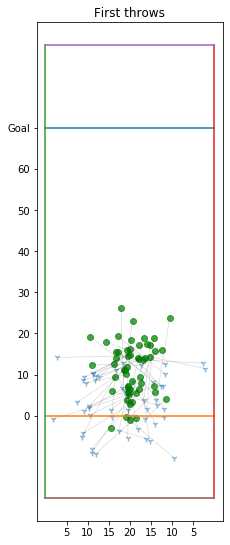

In [33]:
#scatter plot of all throwing positions
fig = plt.figure(figsize=(4/1.2,11/1.2))

#all normal throws
plt.scatter(first_pass_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-first_pass_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            marker='1',
           alpha=.5)

#all receptions
plt.scatter(first_pass_df['End X (0 -> 1 = left sideline -> right sideline)'],
           1-first_pass_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='g',
            marker='o',
           alpha=.7)

#lines connecting points
xstart = first_pass_df['Start X (0 -> 1 = left sideline -> right sideline)']
ystart = 1-first_pass_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
xend = first_pass_df['End X (0 -> 1 = left sideline -> right sideline)']
yend = 1-first_pass_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([xstart,xend],[ystart,yend],
         'k',
         alpha=.2,
         linewidth=.5)

#attacking endzone line
x1 = [0,1]
y1 = [.8181818,.8181818]
plt.plot(x1,y1)

#defending endzone line
x2 = [0,1]
y2 = [.1818181,.1818181]
plt.plot(x2,y2)

#backhand sideline
x3 = [0,0]
y3 = [0,1]
plt.plot(x3,y3)

#flick sideline
x4 = [1,1]
y4 = [0,1]
plt.plot(x4,y4)

#attacking backline
x5 = [0,1]
y5 = [1,1]
plt.plot(x5,y5)

#defending backline
x6 = [0,1]
y6 = [0,0]
plt.plot(x6,y6)

xtick = .25/2
ytick = .181818/2

plt.xticks(ticks=[xtick,xtick*2,xtick*3,xtick*4,xtick*5,xtick*6,xtick*7],
          labels=[5,10,15,20,15,10,5])
plt.yticks(ticks=[ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9],
          labels=[0,10,20,30,40,50,60,'Goal'])
#plt.xlabel()
#plt.ylabel()
#plt.legend(loc='upper right')
plt.title('First throws')

plt.show()
fig.savefig('figs/centering_passes.png',dpi=300,bbox_inches='tight')